Christian Hansen

# Employee Retention Goal
Employee turn-over is a very costly problem for companies. The cost of replacing an employee if often larger than 100K USD, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses and the loss of productivity for several months.
 t is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is sometimes called people analytics or people data science (if you see a job title: people data scientist, this is your job).
In this challenge, you have a data set with info about the employees and have to predict when employees are going to quit by understanding the main drivers of employee churn.


# Challenge Description
We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.
As said above, the goal is to predict employee retention and understand its main drivers. 

Specifically, you should:
- Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.
- What are the main factors that drive employee churn? Do they make sense? Explain your findings.
- If you could add to this data set just one variable that could help explain employee churn, what would that be?

## Load in data and inspect

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
emp_retention =pd.read_csv('./employee_retention_data.csv')

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
emp_retention.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


Lets look at salary distribution for all employees in the table

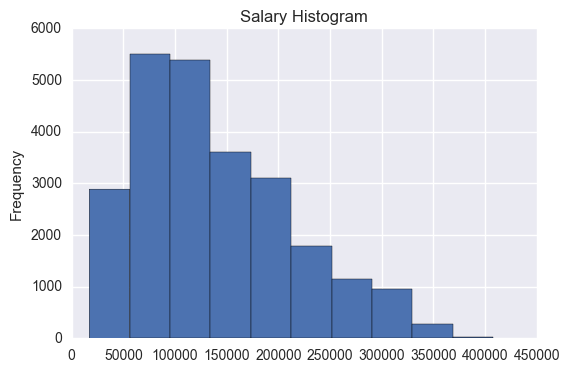

In [3]:
emp_retention['salary'].plot(kind ='hist',title= 'Salary Histogram')

In [4]:
emp_retention['salary'].describe()

count     24702.000000
mean     138183.345478
std       76058.184573
min       17000.000000
25%       79000.000000
50%      123000.000000
75%      187000.000000
max      408000.000000
Name: salary, dtype: float64

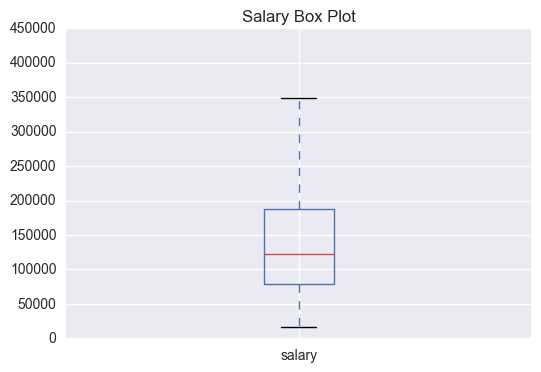

In [5]:
emp_retention['salary'].plot(kind='box',title ='Salary Box Plot')

In [6]:
emp_retention['employee_head_count'] = 1

## We can see that for the salary of all employees the mean is on the lower side.

Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.

In [7]:
emp_retention['join_date'].min(),emp_retention['quit_date'].max()

('2011-01-24', '2015-12-09')

In [8]:
start = '2011-01-24'
end = '2015-12-13'

In [9]:
emp_retention['join_date']= pd.to_datetime(emp_retention['join_date'])
emp_retention['quit_date']= pd.to_datetime(emp_retention['quit_date'])

In [10]:
segmented_by_date = emp_retention[(emp_retention['join_date'] > start) &
              (emp_retention['quit_date'] < end)]

In [11]:
emp_retention.shape

(24702, 8)

In [12]:
segmented_by_date.shape

(13429, 8)

In [13]:
# so we've limited the values a bit, that's good!

In [14]:
seg_grouped = segmented_by_date.groupby(['quit_date','company_id']).sum().reset_index()[['quit_date','company_id','employee_head_count']]

In [15]:
seg_grouped.head()

,quit_date,company_id,employee_head_count
0,2011-10-13,6,1
1,2011-10-14,10,1
2,2011-10-28,4,1
3,2011-11-11,1,1
4,2011-11-22,1,1


In [16]:
# seg_grouped[['join_date','employee_head_count']].plot(x='join_date',
#                                                       y='employee_head_count',marker = '^')

In [17]:
## lets assume for a while that this is okay...

In [18]:
emp_retention.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employee_head_count
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1


In [19]:
joined_data = segmented_by_date.groupby(['join_date','company_id']).sum().reset_index()
quit_data = segmented_by_date.groupby(['quit_date','company_id']).sum().reset_index()

In [20]:
merged_data = pd.merge(joined_data,quit_data, on='company_id')

In [21]:
merged_data.head()

,join_date,company_id,employee_id_x,seniority_x,salary_x,employee_head_count_x,quit_date,employee_id_y,seniority_y,salary_y,employee_head_count_y
0,2011-01-25,1,941659.0,22,157000.0,2,2011-11-11,71407.0,19,107000.0,1
1,2011-01-25,1,941659.0,22,157000.0,2,2011-11-22,202573.0,10,199000.0,1
2,2011-01-25,1,941659.0,22,157000.0,2,2011-11-25,571350.0,7,119000.0,1
3,2011-01-25,1,941659.0,22,157000.0,2,2011-12-09,410589.0,14,208000.0,1
4,2011-01-25,1,941659.0,22,157000.0,2,2011-12-16,694726.0,5,70000.0,1


In [22]:
join_series  = merged_data['join_date']
unique_times = pd.DataFrame(join_series.append(merged_data['quit_date']).unique())

In [23]:
unique_companies = pd.DataFrame(merged_data['company_id'].unique())

In [24]:
unique_companies['key'] = 0
unique_times['key'] = 0
companies_and_times = pd.merge(unique_companies,unique_times, on = 'key')
companies_and_times.drop('key',1, inplace=True)

In [25]:
companies_and_times.columns = ['company_id','date']

In [26]:
companies_and_times.head()

,company_id,date
0,1,2011-01-25
1,1,2011-01-26
2,1,2011-01-31
3,1,2011-02-01
4,1,2011-02-02


In [27]:
data_headcount = pd.merge(companies_and_times,joined_data,left_on=['date','company_id'],right_on=['join_date','company_id'])
data_headcount_2 = pd.merge(data_headcount,quit_data,left_on=['date','company_id'],right_on=['quit_date','company_id'])

In [28]:
data_headcount_2.head()

,company_id,date,join_date,employee_id_x,seniority_x,salary_x,employee_head_count_x,quit_date,employee_id_y,seniority_y,salary_y,employee_head_count_y
0,1,2011-11-22,2011-11-22,927450.0,28,212000.0,1,2011-11-22,202573.0,10,199000.0,1
1,1,2012-01-03,2012-01-03,21443432.0,448,6141000.0,37,2012-01-03,212530.0,18,127000.0,1
2,1,2012-01-05,2012-01-05,678769.0,8,217000.0,1,2012-01-05,356783.0,15,128000.0,1
3,1,2012-01-09,2012-01-09,10359239.0,275,3310000.0,20,2012-01-09,391605.0,26,110000.0,1
4,1,2012-01-17,2012-01-17,13136562.0,371,4302000.0,29,2012-01-17,150032.0,5,164000.0,1


In [29]:
grouped_headcount = data_headcount_2.groupby(['company_id','date']).sum()

In [30]:
head_count_by_company = grouped_headcount['employee_head_count_x'] - grouped_headcount['employee_head_count_y']

In [31]:
day_count_company = head_count_by_company.reset_index()

In [32]:
day_count_company.head()

,company_id,date,0
0,1,2011-11-22,0
1,1,2012-01-03,36
2,1,2012-01-05,0
3,1,2012-01-09,19
4,1,2012-01-17,28


In [33]:
day_count_company.columns = ['company_id','date','employee_headcount']
day_count_company.to_csv('day_count_company.csv')

company_id
1     Axes(0.125,0.2;0.775x0.7)
2     Axes(0.125,0.2;0.775x0.7)
3     Axes(0.125,0.2;0.775x0.7)
4     Axes(0.125,0.2;0.775x0.7)
5     Axes(0.125,0.2;0.775x0.7)
6     Axes(0.125,0.2;0.775x0.7)
7     Axes(0.125,0.2;0.775x0.7)
8     Axes(0.125,0.2;0.775x0.7)
9     Axes(0.125,0.2;0.775x0.7)
10    Axes(0.125,0.2;0.775x0.7)
dtype: object

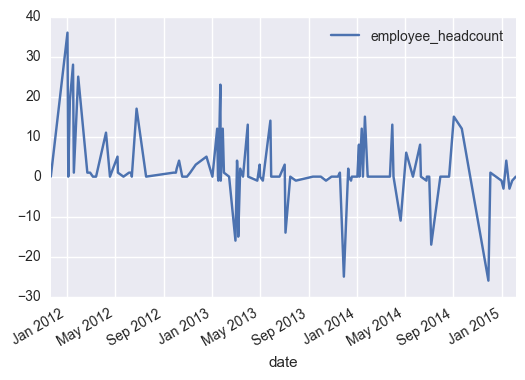

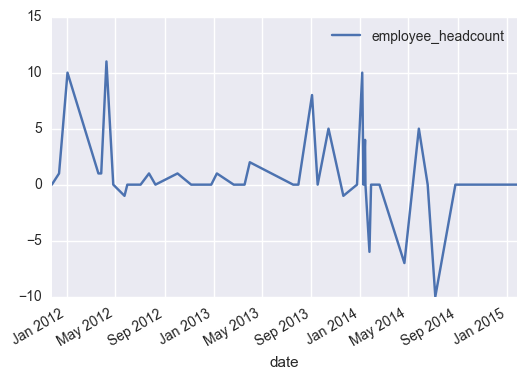

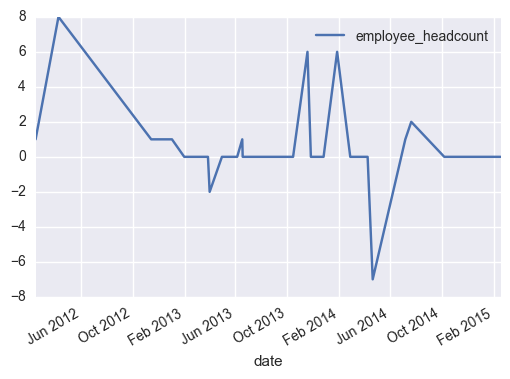

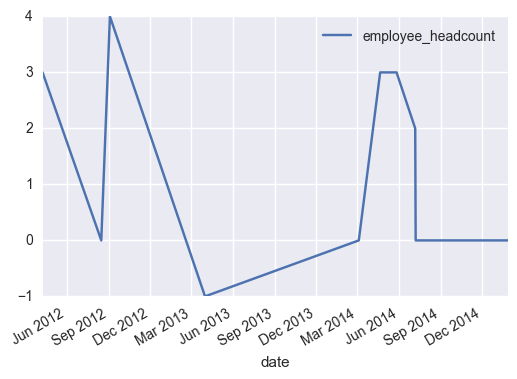

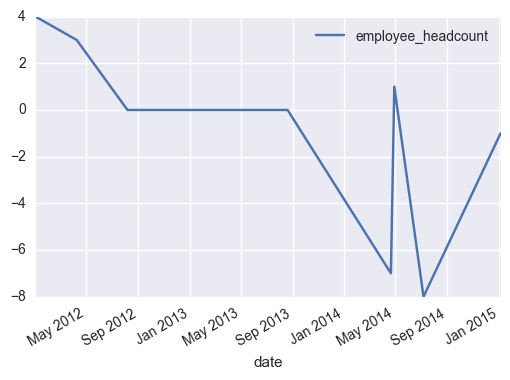

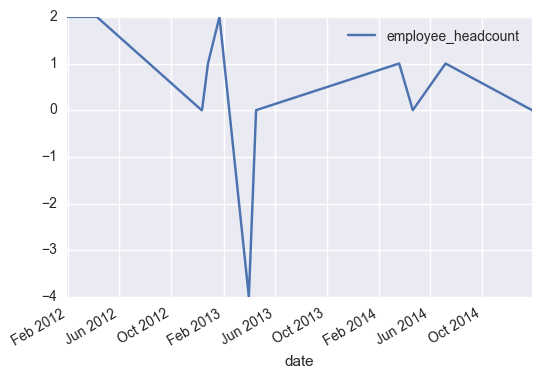

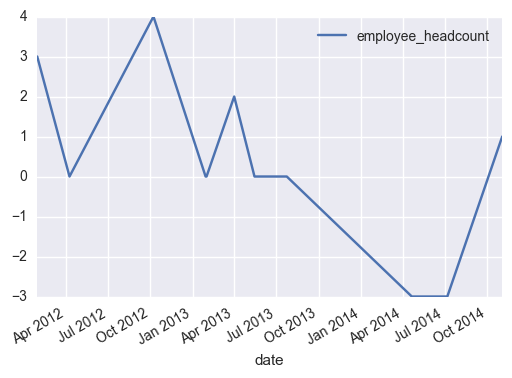

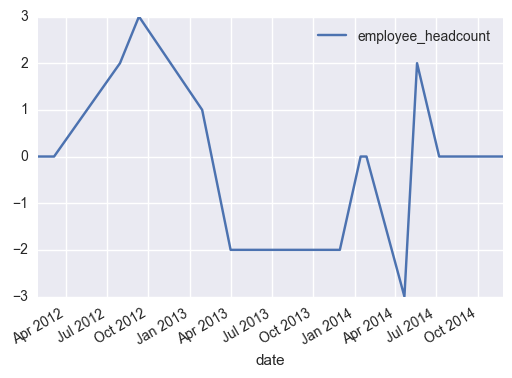

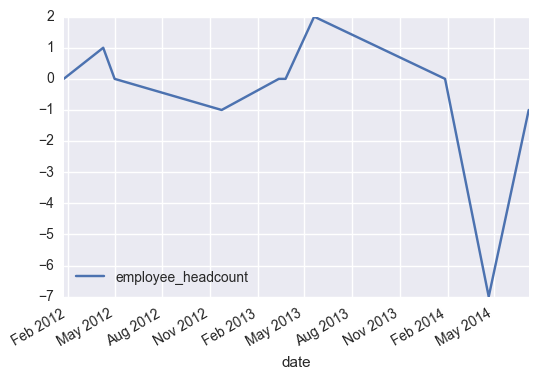

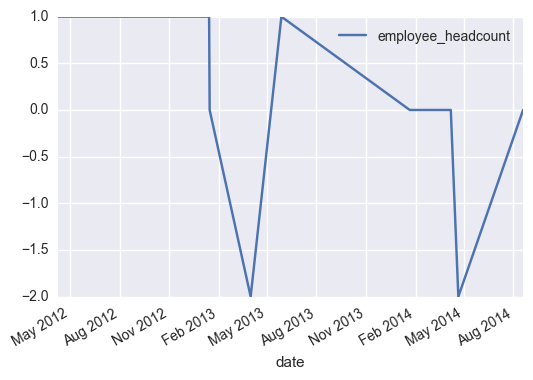

In [34]:
day_count_company.groupby('company_id').plot(x='date',y='employee_headcount')

## What are the main factors that drive employee churn? Do they make sense? Explain your findings.


The main factors of churn are going to be corelated by department segment, seniority, and salary. I would assume the department is consistent across the company.

## Find how many days or weeks an employee was working

In [35]:
emp_retention['days'] = emp_retention['quit_date']-emp_retention['join_date']

In [36]:
def get_days(date):
    ## catch only users with end dates if it's zero the person is still working
    try:
        return(date.days)
    except:
        return(0)

In [37]:
emp_retention['days']=emp_retention['days'].apply(get_days)

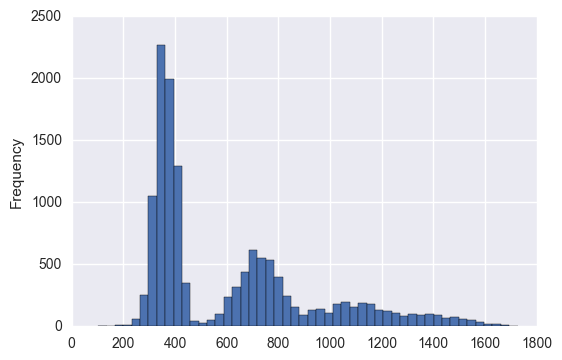

In [38]:
emp_retention[emp_retention['days']>0]['days'].plot(kind = 'hist',bins = 50)

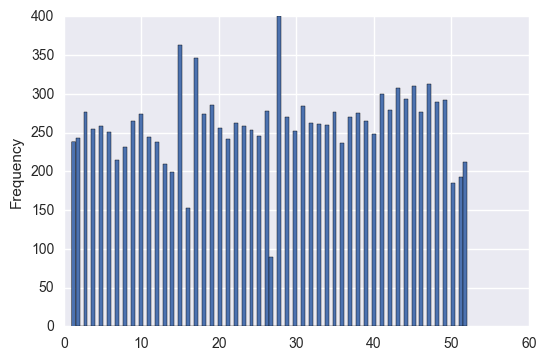

In [39]:
emp_retention['quit_date'].apply(lambda x: x.week).plot(kind='hist',bins = 100)

###  Build a model based on time before quitting. the excercise book recommends those who quit before and after a year as two separate classses.

In [323]:
emp_retention['quit_within_year'] = emp_retention['days'].apply(lambda day: day < 400 )

In [324]:
emp_retention.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employee_head_count,days,quit_within_year
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1,585,False
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1,340,True
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,1,0,True
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1,389,True
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1,1040,False


## Lets feature engineer a little more by encoding dept and company id, perhaps those matter.

In [325]:
from sklearn.cross_validation import train_test_split
features = emp_retention[['salary','seniority']]
target = emp_retention['quit_within_year']
dummies = pd.get_dummies(emp_retention[['dept','company_id']])
features = pd.concat([dummies,features],axis = 1)

In [326]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np

def rfc_model_analysis(model,X,Y):
    # Model Must be a Random Forest Classifier
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)
    model.fit(X_train,y_train)
    predict = model.predict_proba(X_test)[:,1]
    
    prec, rec, thresh1 = precision_recall_curve(y_test,predict)
    fpr,tpr, thresh2 = roc_curve(y_test,predict)
    
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(rec,prec)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr)
    plt.plot([1,0], [1,0], 'k--', lw=2)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.show()

    # F1 = 2 * (prec * rec) / (prec + rec)
    thresh2 = list(thresh2)
#     thresh2.append(1)
    plt.subplot(1,2,1)
    plt.plot(thresh2,tpr)
    plt.title('TPR Versus Threshold')
    plt.ylabel('tpr')
    plt.xlabel('Threshold')
    # F1 = 2 * (prec * rec) / (prec + rec)
#   thresh2 = list(thresh2)
    #thresh2.append(1)
    plt.subplot(1,2,2)
    plt.plot(thresh2,fpr)
    plt.title('FPR Versus Threshold')
    plt.ylabel('fpr')
    plt.xlabel('Threshold')
    plt.show()
    
    sort_index = np.argsort(model.feature_importances_)
    importances = model.feature_importances_
    sort_importances = importances[sort_index]
    # plt.subplot(1,2,1)
    fig, ax = plt.subplots(figsize =(5,10))
    ind = np.array(range(len(X_test.columns[sort_index])))+.7
    # plt.figure(figsize = (10,20))

    plt.barh(ind,sort_importances);
    ax.set_yticks(ind + .3);
    ax.set_yticklabels((X_test.columns[sort_index]))
    plt.title('Feature Importance')
    plt.show()

    print("At threshold = 0.5")
    print metrics.classification_report(y_test,predict>0.5)
    print 'accuracy: ',metrics.accuracy_score(y_test,predict>0.5)
    return(model,prec,rec,fpr,tpr)

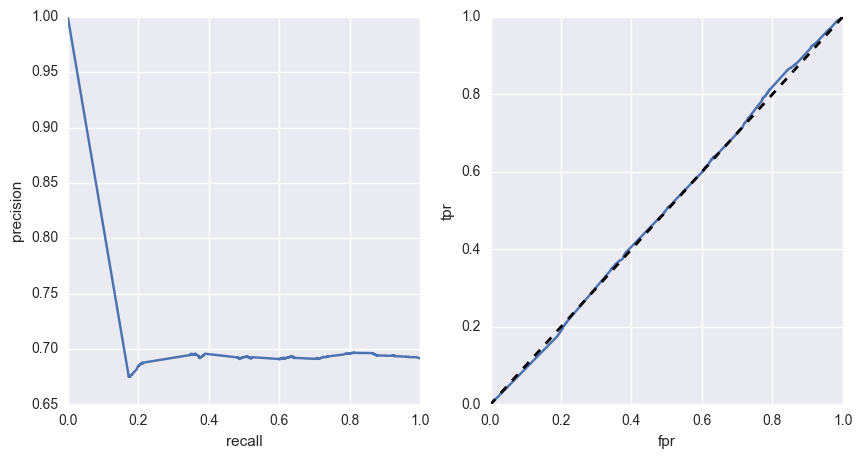

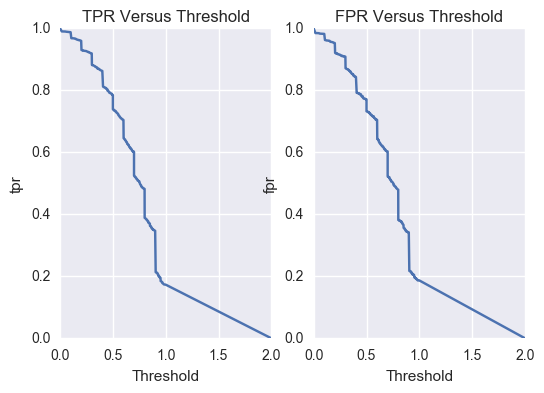

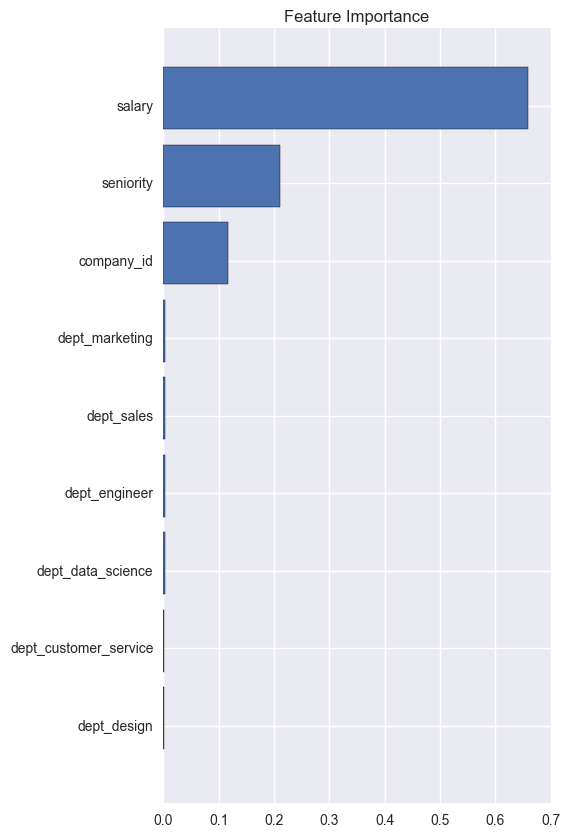

At threshold = 0.5
             precision    recall  f1-score   support

      False       0.31      0.27      0.29      2287
       True       0.69      0.74      0.72      5124

avg / total       0.58      0.59      0.58      7411

accuracy:  0.593442180542


In [327]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
fit_model,prec,rec,fpr,tpr  = rfc_model_analysis(model,features,target)

This is not a meaningful as a predictor, but shows that the salary is the most promiment split for the features.

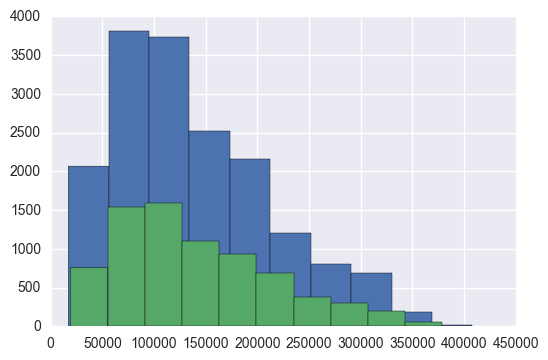

In [328]:
emp_retention[emp_retention['quit_within_year']==True]['salary'].hist()
emp_retention[emp_retention['quit_within_year']==False]['salary'].hist()

This is a contradictory plot at first glance, but lets explore this in detail.

The blue plot shows a higher concentration of salaries on the low end and the green plot shows a lower concentration in that region. There are just more overall people in the quit within a year group.

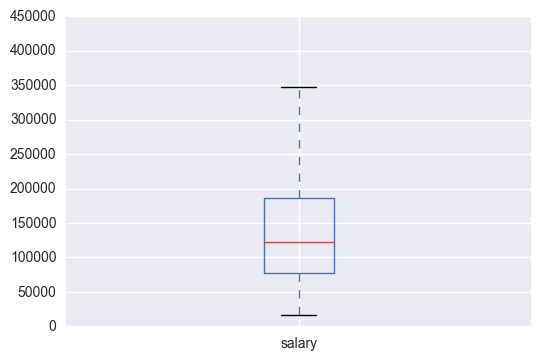

In [329]:
emp_retention[emp_retention['quit_within_year']==True]['salary'].plot(kind='box')

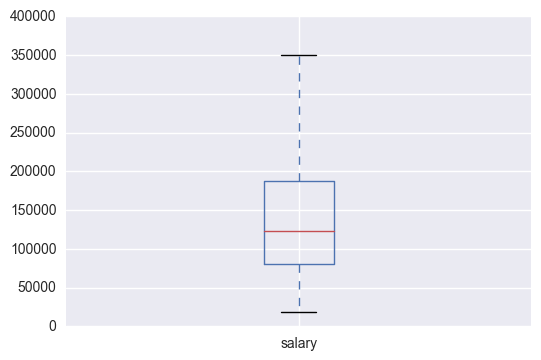

In [330]:
emp_retention[emp_retention['quit_within_year']==False]['salary'].plot(kind='box')

In [334]:
t1 = emp_retention[emp_retention['quit_within_year']==True]
temp =t1.groupby(pd.cut( x = t1['salary'], bins = np.percentile(t1['salary'],q = np.arange(0,100)),include_lowest=True)).sum()

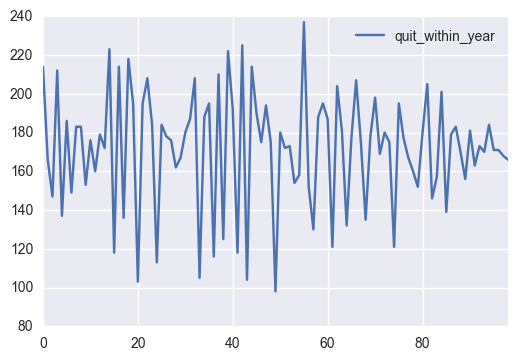

In [335]:
temp['quit_within_year'].reset_index().plot()

In [333]:
emp_retention['salary'].quantile()

123000.0

In [336]:
# pd.qcut(emp_retention['salary'],q=100).value_counts()

In [248]:
percentile.str.split(',')

['(87000', '89000]']

In [238]:
np.percentile(emp_retention['salary'], q = range(0,100))

array([  17000.,   23000.,   25000.,   28000.,   30000.,   33000.,
         37000.,   42000.,   45000.,   49000.,   52000.,   55000.,
         57000.,   59000.,   61000.,   62000.,   64000.,   65000.,
         67000.,   68000.,   70000.,   72000.,   73000.,   75000.,
         77000.,   79000.,   80260.,   82000.,   84000.,   87000.,
         89000.,   90000.,   92000.,   94000.,   96000.,   97000.,
         99000.,  101000.,  102000.,  104000.,  105000.,  107000.,
        109000.,  110000.,  112000.,  114000.,  115000.,  117000.,
        119000.,  121000.,  123000.,  124000.,  126000.,  128000.,
        131000.,  133000.,  135000.,  137000.,  140000.,  142000.,
        145000.,  148000.,  151000.,  153000.,  156000.,  158000.,
        161000.,  164000.,  167000.,  170000.,  172000.,  175000.,
        178000.,  181000.,  184000.,  187000.,  190000.,  193000.,
        196000.,  199000.,  202000.,  205000.,  209000.,  213000.,
        217000.,  221000.,  226000.,  230000.,  237000.,  2430

In [236]:
 emp_retention.groupby(['quit_within_year'])['salary'].transform(lambda x: x.quantile(.6))

0        144000.0
1        146000.0
2        146000.0
3        144000.0
4        144000.0
5        144000.0
6        146000.0
7        146000.0
8        144000.0
9        146000.0
10       144000.0
11       146000.0
12       146000.0
13       144000.0
14       146000.0
15       144000.0
16       144000.0
17       146000.0
18       146000.0
19       146000.0
20       146000.0
21       146000.0
22       144000.0
23       146000.0
24       144000.0
25       144000.0
26       146000.0
27       146000.0
28       144000.0
29       144000.0
           ...   
24672    146000.0
24673    144000.0
24674    144000.0
24675    146000.0
24676    146000.0
24677    144000.0
24678    146000.0
24679    146000.0
24680    146000.0
24681    146000.0
24682    146000.0
24683    146000.0
24684    144000.0
24685    144000.0
24686    144000.0
24687    144000.0
24688    146000.0
24689    144000.0
24690    144000.0
24691    146000.0
24692    144000.0
24693    146000.0
24694    146000.0
24695    144000.0
24696    1

In [272]:
from scipy import stats

#generate ramdom data with same seed (to be reproducible)

#quantile function
x = emp_retention['salary'].quantile(0.2)
#inverse of quantile
stats.percentileofscore(emp_retention['salary'],x)

20.004453080722211

0.0